In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
bank_data = pd.read_csv('bank-full.csv', sep=';')

In [3]:
bank_data.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
bank_data.shape

(45211, 17)

In [5]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
((bank_data['y'] =='no')*1).sum()/bank_data.shape[0]

0.8830151954170445

#### The number 0.883 shows that it is a pretty inbalanced sample. Most of the customers have not subscribed a term deposit
#### Ways to handle inbalanced sample: resampling (oversampling like SMOTE, under sampling like Tomek Links), customized loss function (cost-sensitive), ensemble, matching

### Descriptive Analysis

### Numerical Variables

In [7]:
numeric_lst = ['age', 'balance', 'pdays', 'duration', 'campaign', 'previous']

#### Age: Right-skewed distrtibution

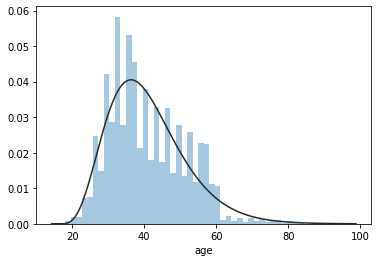

In [8]:
sns.distplot(bank_data['age'], kde=False, fit=stats.gamma)

#### Balance: extremely right-skewed distribution

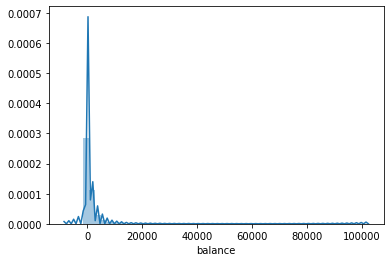

In [9]:
sns.distplot(bank_data['balance'])

#### pdays: right-skewes

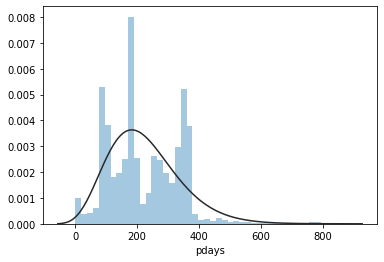

In [10]:
sns.distplot(bank_data.loc[bank_data['pdays'] > 0, 'pdays'], kde=False, fit=stats.gamma)

#### duration: right-skewes

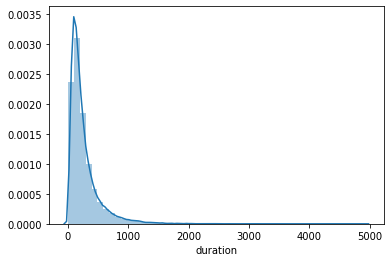

In [11]:
sns.distplot(bank_data['duration'], kde=True)

#### campaign: also right skewed

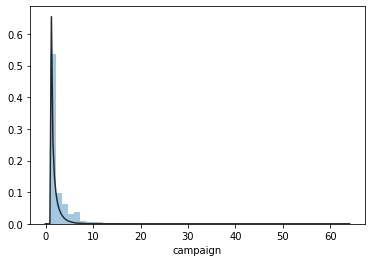

In [12]:
sns.distplot(bank_data['campaign'], kde=False, fit=stats.gamma)

#### previous: only very few positive values

In [13]:
((bank_data['previous'] > 0) * 1).sum()

8257

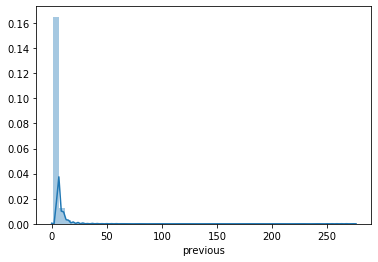

In [14]:
sns.distplot(bank_data.loc[bank_data['previous'] > 0, 'previous'], kde=True)

In [15]:
bank_data[numeric_lst].describe()

,age,balance,pdays,duration,campaign,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,40.197828,258.163080,2.763841,0.580323
std,10.618762,3044.765829,100.128746,257.527812,3.098021,2.303441
min,18.000000,-8019.000000,-1.000000,0.000000,1.000000,0.000000
25%,33.000000,72.000000,-1.000000,103.000000,1.000000,0.000000
50%,39.000000,448.000000,-1.000000,180.000000,2.000000,0.000000
75%,48.000000,1428.000000,-1.000000,319.000000,3.000000,0.000000
max,95.000000,102127.000000,871.000000,4918.000000,63.000000,275.000000


### Feature Engineering

### Part I Null value manipulation

In [16]:
unknown_dict = {}
for col in bank_data.columns:
    unknown_dict[col] = ((bank_data[col] == 'unknown')*1).sum()

C:\Users\henryxu\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [17]:
unknown_dict

{'age': 0,
 'job': 288,
 'marital': 0,
 'education': 1857,
 'default': 0,
 'balance': 0,
 'housing': 0,
 'loan': 0,
 'contact': 13020,
 'day': 0,
 'month': 0,
 'duration': 0,
 'campaign': 0,
 'pdays': 0,
 'previous': 0,
 'poutcome': 36959,
 'y': 0}

In [18]:
bank_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### For job and education: We can regard unknown as an individual class since there is underlying information for being unknown.

In [19]:
bank_data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [20]:
bank_data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [21]:
# sns.pairplot(bank_data, hue="education", dropna=True, diag_kind="hist")

### For poutcome: unknown is the majority class. Cannot be encoded to other classes

In [22]:
bank_data['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

### Part II Generate new features

#### intersection variables

In [23]:
bank_data['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [24]:
bank_data['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [25]:
bank_data.groupby(by=['housing', 'loan', 'y']).count()['age'] / bank_data.shape[0]

housing  loan  y  
no       no    no     0.311185
               yes    0.069342
         yes   no     0.058791
               yes    0.004844
yes      no    no     0.422309
               yes    0.036938
         yes   no     0.090730
               yes    0.005861
Name: age, dtype: float64

In [26]:
bank_data['house_balance'] = ((bank_data['housing'] == 'yes') * 0.5) * bank_data['balance'] + ((bank_data['housing'] == 'no') * 1) * bank_data['balance']

In [27]:
bank_data['loan_balance'] = ((bank_data['loan'] == 'yes') * 0.5) * bank_data['balance'] + ((bank_data['loan'] == 'no') * 1) * bank_data['balance']

#### Polynomial

In [28]:
bank_data['balance_poly'] = bank_data['balance'].apply(lambda x: x ** 2)
bank_data['balance_sqrt'] = np.abs(bank_data['balance'].apply(lambda x: x ** 0.5))

In [29]:
bank_data['contact_poly'] = bank_data['previous'].apply(lambda x: x ** 2)

#### discreteize age feature

In [30]:
bank_data['is_young'] = (bank_data['age'] < 35) * 1
bank_data['is_middle'] = ((bank_data['age'] >= 35) & (bank_data['age'] < 55)) * 1
bank_data['is_old'] = (bank_data['age'] >= 55) * 1

### Part III Encoding the categorical variables

In [31]:
bank_data['is_previous_contacted'] = (bank_data['pdays'] == -1) * 1

In [32]:
bank_data['is_previous_contacted'].value_counts()

1    36954
0     8257
Name: is_previous_contacted, dtype: int64

In [33]:
bank_data['is_debt'] = ((bank_data['loan'] == 'yes') * 1) + ((bank_data['housing'] == 'yes') * 1)

In [34]:
bank_data['is_pdays'] = (bank_data['pdays'] == -1) * 1

### Output the temporary result

In [35]:
bank_data.to_csv("bank_data_features_added.csv", index=False)

### Part IV standardize the variable to eliminate the skewness for linear model

In [36]:
new_numeric_lst = ['balance_poly', 'balance_sqrt', 'contact_poly', 'house_balance', 'loan_balance']

In [37]:
full_numeric_lst = new_numeric_lst + numeric_lst

In [38]:
min_max_scaler = preprocessing.MinMaxScaler()

In [39]:
bank_data_scaled = bank_data.copy()

In [40]:
bank_data_scaled[full_numeric_lst] = min_max_scaler.fit_transform(bank_data_scaled[full_numeric_lst])

In [41]:
bank_data_scaled.to_csv("bank_data_features_added_numeric_scaled.csv", index=False)

### Handling category variables

In [42]:
def processData(origin_data: pd.DataFrame, cat_lst: list = ["job", "marital", "education", "default", "housing", "loan", "contact", "poutcome"]) -> (pd.DataFrame, pd.DataFrame):
    """
    Process the original data
    @param origin_data: original data in DataFrame object;
    @return: the data like (datas, labels) after processing;
    """
    origin_data["month"] = origin_data["month"].astype(pd.CategoricalDtype(['jan', 'feb', 'mar','apr', 'may', 'jun', 'jul', 'aug', 'sep',  'oct', 'nov', 'dec'], ordered=True)).cat.codes
    dummies_df = pd.get_dummies(origin_data, columns=cat_lst)
    
    return dummies_df

In [43]:
bank_data_scaled_onehot = processData(bank_data_scaled)

In [44]:
bank_data_scaled_onehot['y'] = (bank_data_scaled_onehot['y'] == 'yes') * 1

In [45]:
bank_data_scaled_onehot.to_csv("bank_data_features_added_numeric_scaled_onehot.csv", index=False)

### Outliers detection

### Resampling

In [46]:
from imblearn.over_sampling import SMOTE, ADASYN

In [47]:
bank_data_scaled_onehot

,age,balance,day,month,duration,campaign,pdays,previous,y,house_balance,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.519481,0.092259,5,4,0.053070,0.000000,0.000000,0.000000,0,0.082531,...,1,1,0,0,0,1,0,0,0,1
1,0.337662,0.073067,5,4,0.030704,0.000000,0.000000,0.000000,0,0.072935,...,1,1,0,0,0,1,0,0,0,1
2,0.194805,0.072822,5,4,0.015453,0.000000,0.000000,0.000000,0,0.072812,...,1,0,1,0,0,1,0,0,0,1
3,0.376623,0.086476,5,4,0.018707,0.000000,0.000000,0.000000,0,0.079640,...,1,1,0,0,0,1,0,0,0,1
4,0.194805,0.072812,5,4,0.040260,0.000000,0.000000,0.000000,0,0.072812,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,0.080293,17,10,0.198658,0.032258,0.000000,0.000000,1,0.080293,...,0,1,0,1,0,0,0,0,0,1
45207,0.688312,0.088501,17,10,0.092721,0.016129,0.000000,0.000000,1,0.088501,...,0,1,0,1,0,0,0,0,0,1
45208,0.701299,0.124689,17,10,0.229158,0.064516,0.212156,0.010909,1,0.124689,...,0,1,0,1,0,0,0,0,1,0
45209,0.506494,0.078868,17,10,0.103294,0.048387,0.000000,0.000000,0,0.078868,...,0,1,0,0,1,0,0,0,0,1


### Only 0.117 percent of y is true sample. Resampling or cost-sensitive classification needed

In [48]:
bank_data_scaled_onehot['y'].mean()

0.11698480458295547

In [66]:
from imblearn.over_sampling import SMOTE

def SMOTE_resampling(origin_data: pd.DataFrame, target_percent: float, target_variable: str='y', random_state: int=0):
    """
    Process the original data
    Note: for real usage, we need to apply it only on the test set. Otherwise it may lead to potential data leak.
    
    @param origin_data: original data in DataFrame object;
    @param target_percent: target percent we want to achieve
    @param random_state: random state for reproductivity. default is 0.
    @return: the data like after Smote resampling;
    """
    col_name_lst = origin_data.drop(columns=[target_variable]).columns
    X = origin_data.drop(columns=[target_variable]).values
    y = origin_data[target_variable].values.reshape(-1,1)
    print(X.shape)
    print(y.shape)
    
    sampler = SMOTE(sampling_strategy=target_percent, random_state=random_state)
    X_res, y_res = sampler.fit_resample(X, y)
    
    result_df = pd.DataFrame(X_res, columns=col_name_lst)
    result_df = pd.concat([result_df, pd.DataFrame(y_res, columns=[target_variable])], axis=1)
    return result_df



# def SMOTE_resampling(origin_data: pd.DataFrame, target_variable: str='y', random_state: int=0):
#     """
#     Process the original data
#     Note: for real usage, we need to apply it only on the test set. Otherwise it may lead to potential data leak.
    
#     @param origin_data: original data in DataFrame object;
#     @param target_percent: target percent we want to achieve
#     @param random_state: random state for reproductivity. default is 0.
#     @return: the data like after Smote resampling;
#     """
#     col_name_lst = origin_data.drop(columns=[target_variable]).columns
#     X = origin_data.drop(columns=[target_variable]).values
#     y = origin_data[target_variable].values.reshape(-1,1)
#     print(X.shape)
#     print(y.shape)
    
#     sampler = SMOTE(random_state=random_state)
#     X_res, y_res = sampler.fit_resample(X, y)
    
#     result_df = pd.DataFrame(X_res, columns=col_name_lst)
#     result_df = pd.concat([result_df, pd.DataFrame(y_res, columns=[target_variable])])
#     return result_df

In [67]:
result_df = SMOTE_resampling(bank_data_scaled_onehot, 0.3)

(45211, 51)
(45211, 1)


In [68]:
result_df

,age,balance,day,month,duration,campaign,pdays,previous,house_balance,loan_balance,...,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,0.519481,0.092259,5.000000,4.000000,0.053070,0.000000,0.000000,0.000000,0.082531,0.058389,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,0.337662,0.073067,5.000000,4.000000,0.030704,0.000000,0.000000,0.000000,0.072935,0.038480,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
2,0.194805,0.072822,5.000000,4.000000,0.015453,0.000000,0.000000,0.000000,0.072812,0.038217,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
3,0.376623,0.086476,5.000000,4.000000,0.018707,0.000000,0.000000,0.000000,0.079640,0.052390,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
4,0.194805,0.072812,5.000000,4.000000,0.040260,0.000000,0.000000,0.000000,0.072812,0.038217,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51893,0.099378,0.105482,19.543484,3.456516,0.042444,0.007363,0.000000,0.000000,0.105482,0.072105,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
51894,0.532995,0.073600,15.000000,4.239846,0.119870,0.016129,0.000000,0.000000,0.073202,0.039034,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
51895,0.087620,0.074007,18.000000,4.000000,0.120831,0.010660,0.000000,0.000000,0.073405,0.039456,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
51896,0.168406,0.077011,25.000000,4.000000,0.032680,0.000000,0.000000,0.000000,0.076707,0.042572,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
